# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [8]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


In [10]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [11]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [12]:
df.rename(columns={
    'X1 transaction date': 'transaction date',
    'X2 house age': 'house age',
    'X3 distance to the nearest MRT station': 'distance to MRT station',
    'X4 number of convenience stores': 'number of convenience stores',
    'Y house price of unit area': 'house price of unit area'
}, inplace=True)

In [13]:
df.head()

,transaction date,house age,distance to MRT station,number of convenience stores,house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


# Feature and Target Selection

In [14]:
x = df.drop('house price of unit area', axis=1)
y = df["house price of unit area"]

In [15]:
x.shape

(414, 4)

In [16]:
y.shape

(414,)

In [17]:
df.corr()

,transaction date,house age,distance to MRT station,number of convenience stores,house price of unit area
transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
house age,0.049171,1.000000,0.025622,0.049593,-0.210567
distance to MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


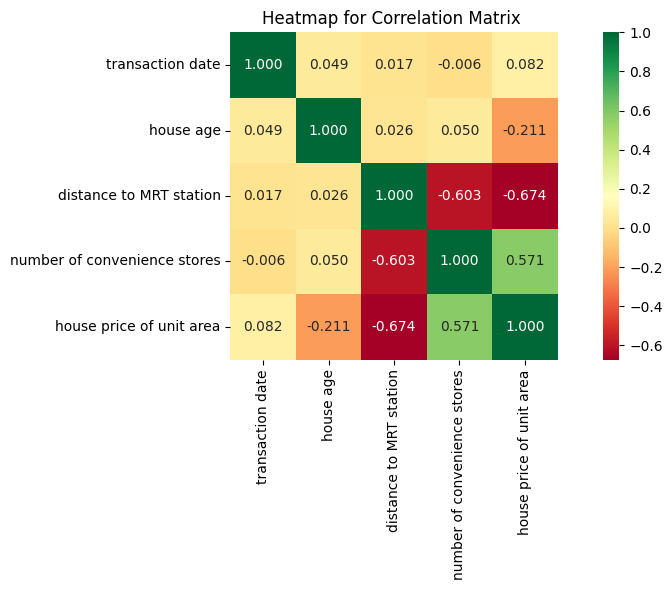

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".3f", cmap="RdYlGn", square=True)
plt.title("Heatmap for Correlation Matrix ")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

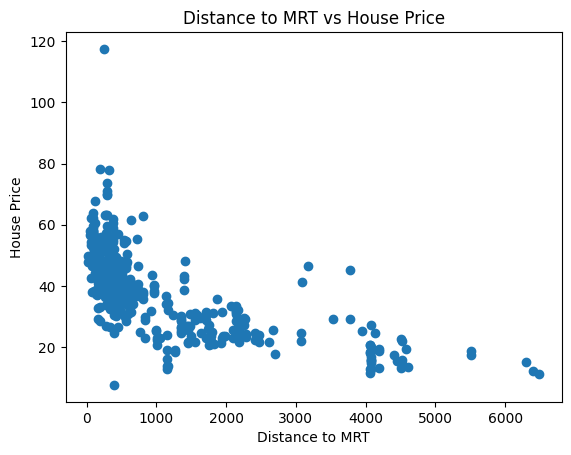

In [19]:
plt.scatter(df['distance to MRT station'], df['house price of unit area'])
plt.xlabel('Distance to MRT')
plt.ylabel('House Price')
plt.title('Distance to MRT vs House Price')
plt.show()

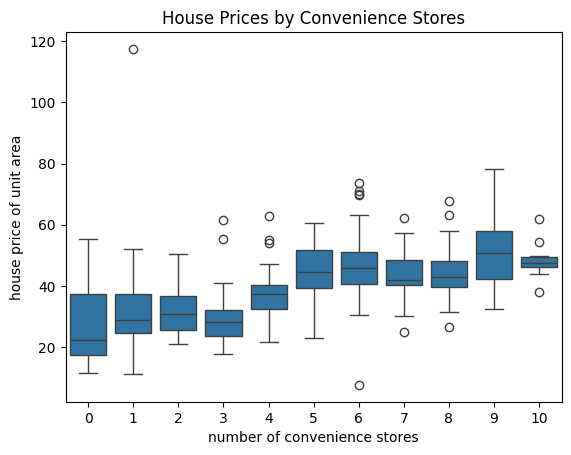

In [20]:
sns.boxplot(x='number of convenience stores', y='house price of unit area', data=df)
plt.title('House Prices by Convenience Stores')
plt.show()

In [21]:
# Outliers need to be handled.

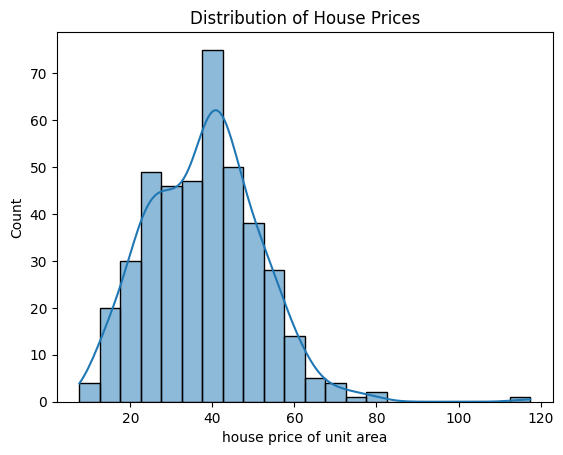

In [22]:
sns.histplot(df['house price of unit area'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

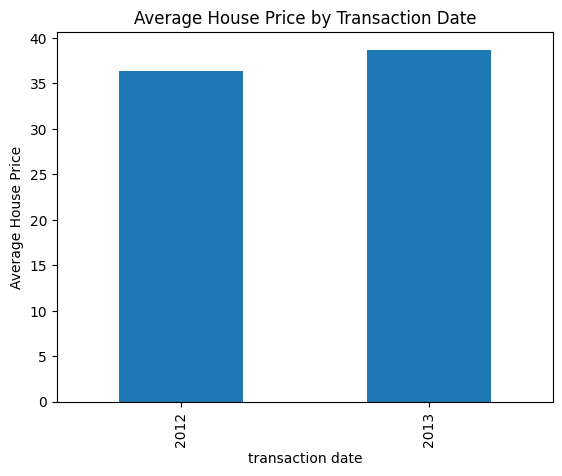

In [23]:
df.groupby('transaction date')['house price of unit area'].mean().plot(kind='bar')
plt.title('Average House Price by Transaction Date')
plt.ylabel('Average House Price')
plt.show()

In [24]:
# Pairplot

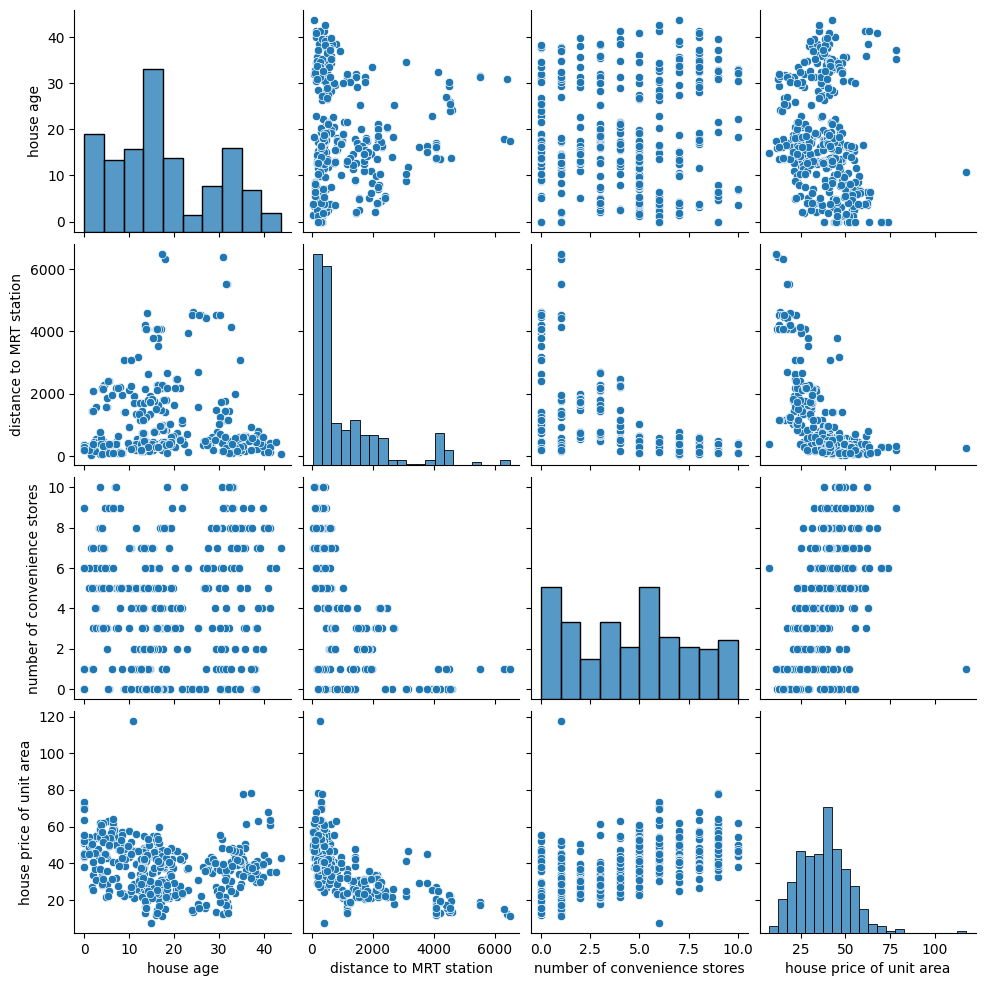

In [25]:
sns.pairplot(data=df[['house age','distance to MRT station','number of convenience stores','house price of unit area']])

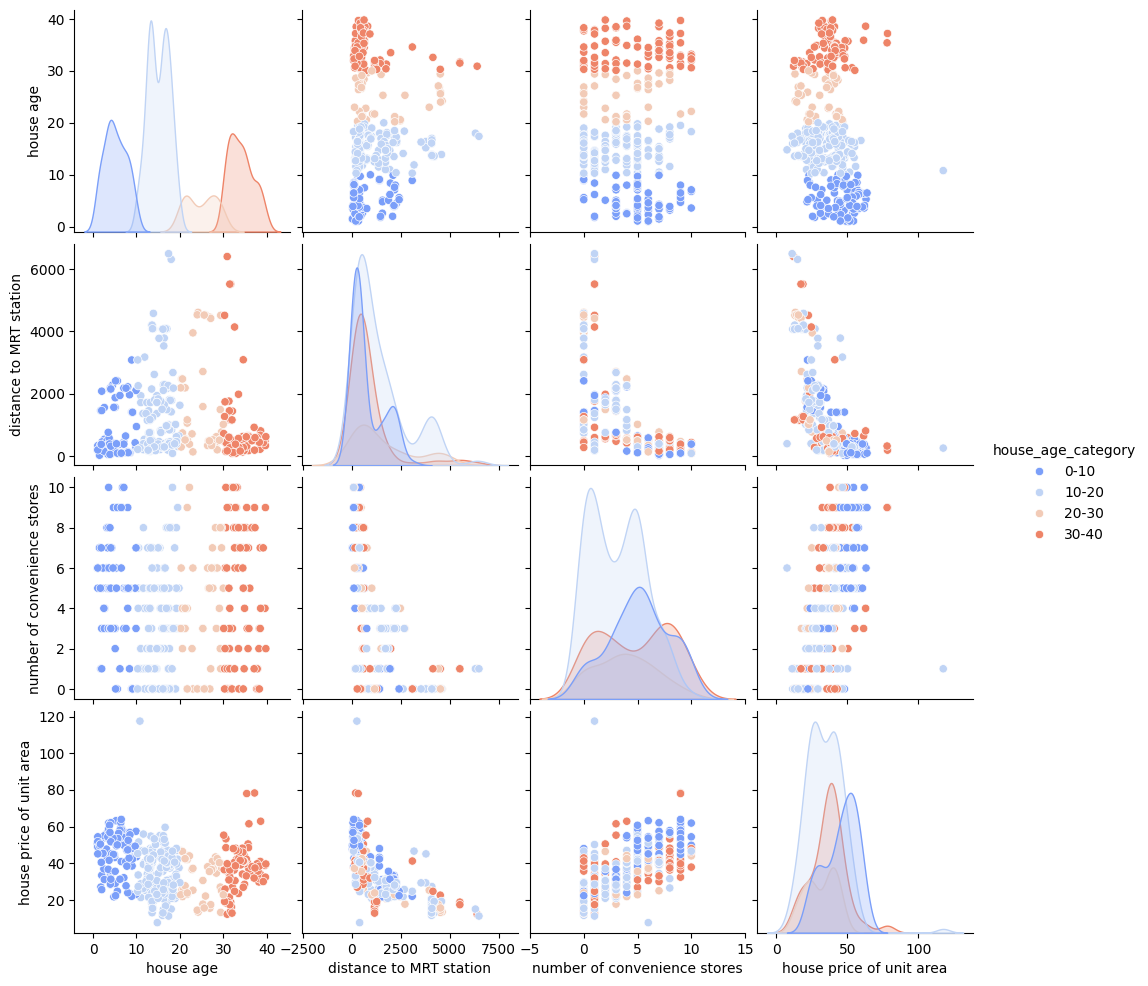

In [26]:
df['house_age_category'] = pd.cut(df['house age'], bins=[0, 10, 20, 30, 40], labels=['0-10', '10-20', '20-30', '30-40'])

sns.pairplot(
    data=df[['house age', 'distance to MRT station', 'number of convenience stores', 'house price of unit area', 'house_age_category']],
    hue='house_age_category',
    palette='coolwarm'
)

##### For this dataset other algorithm will perfom better than linear or polynomial regression.

# Train-Test Split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=42)

In [28]:
xtrain.shape

(289, 4)

In [29]:
xtest.shape

(125, 4)

# Model Training

## Linear Regression

In [30]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [31]:
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [ 2.78410294 -0.23257624 -0.00558695  1.27087806]
Intercept: -5560.451867760038


In [52]:
lr_pred = reg.predict(xtest)
lr_pred

array([50.23523426, 44.48165868, 43.68731994, 38.52990187, 28.06963547,
       44.18373583, 42.2032285 , 44.91755857, 27.33957806, 53.3448726 ,
       33.02762525, 34.83239213, 32.0867224 , 27.30618315, 35.55765433,
       33.47635948, 44.22565683, 48.95311223, 29.58867794, 47.19022269,
        2.29590098, 33.63432744, 46.863739  , 46.62694542, 14.57308255,
       38.43294928, 14.63015948, 40.90321701, 37.06889899, 37.1801725 ,
       12.67233677, 37.85916557, 38.99069315, 33.12722789, 45.92686262,
       32.4396913 , 50.72357303, 17.95503561, 47.13069619, 42.9146363 ,
       34.95012279, 41.07233916, 45.95537087, 35.87113902, 41.74407099,
       46.19716193, 44.6903678 , 23.27144477, 49.57988717, 45.73251284,
       50.23523426, 47.27332709, 41.20238525, 44.24629128, 38.09816276,
       17.93177799, 39.00352778, 32.33920527, 27.99986259, 44.91755857,
       33.84061611, 31.36197378, 17.93177799, 10.04909066,  4.92314459,
       33.65758506, 31.41622159, 47.74621035, 31.73414862, 34.82

In [33]:
print("Predicted values: \n", lr_pred[:10])

Predicted values: 
 [50.23523426 44.48165868 43.68731994 38.52990187 28.06963547 44.18373583
 42.2032285  44.91755857 27.33957806 53.3448726 ]


In [34]:
print("Predicted values:", [round(pred, 1) for pred in lr_pred[:10]])

Predicted values: [50.2, 44.5, 43.7, 38.5, 28.1, 44.2, 42.2, 44.9, 27.3, 53.3]


In [35]:
print("Actual values:\n", ytest[:10].values)

Actual values:
 [45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59. ]


In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(ytest, lr_pred)

72.84834417663645

In [37]:
lr_score = reg.score(xtest, ytest)
lr_score

0.5643696003958187

## Polynomaial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
poly_reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_reg.fit(xtrain, ytrain)
poly_pred = poly_reg.predict(xtest)
poly_pred

array([ 55.25268459,  42.81787282,  52.77591344,  47.10423681,
        22.26134873,  41.48116961,  43.10887735,  45.30804013,
        18.20096085,  56.6046126 ,  26.56641654,  28.35645324,
        31.26818338,  17.98399537,  39.65950761,  28.40478508,
        42.93383693,  53.27044725,  25.3676214 ,  42.87326119,
         2.41667494,  26.15302597,  49.23276881,  45.39896873,
        19.09319712,  46.67562111,  16.35033744,  48.22241951,
        47.7236892 ,  47.32123847,  18.83316285,  33.3233512 ,
        37.46060632,  28.86137304,  43.74613502,  34.84845784,
        53.19785566,  19.81548292,  45.92138094,  52.53838401,
        38.18348814,  38.95939238,  46.27746501,  35.17551752,
        41.02971264,  45.68934017,  39.23692803,  16.69226878,
        54.73378541,  46.61115477,  55.25268459,  50.18257608,
        39.87476921,  39.43567436,  38.9168295 ,  19.79106953,
        40.91222231,  27.88809005,  22.11646964,  45.30804013,
        26.87145907,  27.36554981,  19.79106953,   9.76

In [40]:
poly_score = poly_reg.score(xtest, ytest)
poly_score

0.6185414202220214

## XGBRegressor

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor(random_state=42)
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)

In [43]:
xgb.score(xtest, ytest)

0.6674348330700721

In [44]:
xgb_score = xgb.score(xtest, ytest)
xgb_score

0.6674348330700721

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
rf_pred

array([51.18563333, 37.61143333, 48.3175    , 35.173     , 24.504     ,
       37.162     , 44.5532381 , 50.61517143, 14.826     , 59.76305   ,
       24.605     , 30.90521429, 25.816     , 14.486     , 37.304     ,
       24.307     , 40.177     , 53.30475   , 26.401     , 38.46933333,
       18.694     , 25.062     , 50.246     , 48.05705   , 16.8812    ,
       37.72026667, 17.458     , 48.55831905, 55.394     , 39.14      ,
       15.511     , 24.45166667, 38.001     , 26.036     , 49.17146667,
       37.587     , 53.51085714, 16.88183333, 37.463     , 54.92      ,
       41.818     , 42.156     , 45.6       , 39.119     , 39.98626667,
       48.057     , 34.192     , 23.922     , 50.42755   , 45.465     ,
       51.18563333, 54.944     , 41.354     , 36.377     , 38.267     ,
       18.22583333, 42.019     , 26.18191667, 24.389     , 50.61517143,
       24.903     , 24.309     , 18.22583333, 16.688     , 15.98      ,
       26.951     , 25.59775   , 38.477     , 35.643     , 27.00

In [47]:
rf_score = rf.score(xtest, ytest)
rf_score

0.7461481384743447

# Cat Boost

In [48]:
from catboost import CatBoostRegressor

In [49]:
cat = CatBoostRegressor(random_state=42, iterations=500, learning_rate=0.1, depth=6, verbose=0)
cat.fit(xtrain, ytrain)
cat_pred = cat.predict(xtest)
cat_pred

array([50.87062929, 39.228852  , 44.49378501, 33.471471  , 23.25205243,
       37.97420347, 43.94929568, 49.5361888 , 14.03060294, 59.50087952,
       25.11147528, 30.2961502 , 28.82881053, 14.13204262, 35.40760081,
       23.93677148, 43.18887738, 53.21898227, 26.40813658, 39.01002743,
       19.58039937, 24.52635822, 49.20226976, 50.23635807, 17.91811593,
       37.2278173 , 15.60719208, 41.81797202, 48.94966216, 39.54803877,
       15.31229988, 24.34587118, 37.34745679, 26.00395443, 50.01173828,
       38.82384683, 53.68988707, 18.40303052, 40.40947559, 55.28808296,
       44.7076631 , 43.35578537, 40.45046247, 33.73734905, 40.528145  ,
       49.27140649, 34.01208842, 17.58639372, 48.29385245, 41.52406813,
       50.87062929, 53.97320247, 41.8634166 , 34.47060354, 45.54442108,
       19.00548704, 45.89592797, 25.19216877, 23.31278025, 49.5361888 ,
       25.35482234, 24.8469073 , 19.00548704, 14.39136901, 18.16043475,
       24.52635822, 21.96335311, 38.28376741, 36.42818478, 28.18

In [50]:
cat_score = cat.score(xtest, ytest) 
cat_score

0.7226802387832617

# Model Accuracy Comparison

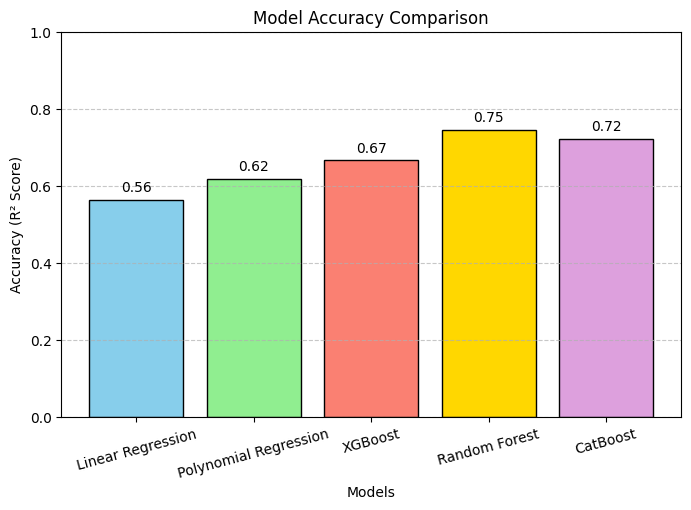

In [51]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum']
model_names = ['Linear Regression', 'Polynomial Regression', 'XGBoost', 'Random Forest', 'CatBoost']
accuracy_scores = [lr_score, poly_score, xgb_score, rf_score, cat_score]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color=colors, edgecolor='black')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{score:.2f}", 
             ha='center', fontsize=10)

plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (R² Score)')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()